<a href="https://colab.research.google.com/github/Sail0027/DA_UT_2021/blob/main/C2/C2T2_Exploratory_Data_Analysis_Report_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

It's ready to begin the work by preparing and exploring the data.
Here are some notes about the project:

**Problem:**</p>

1.   Increase in customer default rates - This is bad for Credit One since we approve the customers for loans in the first place.
2.   Revenue and customer loss for clients and, eventually, loss of clients for Credit One

**Investigative Questions::**</p>

1.   How do you ensure that customers can/will pay their loans? Can we do this?

**Some Lessons:**</p>

1.   We cannot control customer spending habits
2.   We cannot always go from what we find in our analysis to the underlying "why"
3.   We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?
4.   What concrete information can we derive from the data we have?
5.   What proven methods can we use to uncover more information and why?


# Import Data

In [172]:
# import:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
csv_path = '/content/drive/MyDrive/01_DA UT_2021/02_C2/02_C2.T2/Default_Payments_Cleansed.csv'
credit = pd.read_csv(csv_path)

In [3]:
# Check the first 5 rows of the data frame:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
# Information about the data set:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
# Data type of each column:
credit.dtypes

ID                             int64
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

## Get Dummies

In [175]:
# Rename the column:
credit = credit.rename(columns={'default payment next month': 'DEFAULT'})
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [176]:
# Get dummies:
credit['DEFAULT'] = pd.get_dummies(credit['DEFAULT'])
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [160]:
# Map the data:
credit['SEX'] = credit['SEX'].map({'female': 1, 'male': 0})
credit['EDUCATION'] = credit['EDUCATION'].map({'graduate school' : 1, 'university' : 2, 'high school' : 3, 'others' : 0})
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,1,2.0,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,0
1,2,120000,1,2.0,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,1,2.0,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,1,2.0,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,0,2.0,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [161]:
credit['DEFAULT'].value_counts() # 0: not default, 1: default

1    23364
0     6636
Name: DEFAULT, dtype: int64

In [162]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  int64  
 2   SEX        30000 non-null  int64  
 3   EDUCATION  29532 non-null  float64
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  int64  
 13  BILL_AMT2  30000 non-null  int64  
 14  BILL_AMT3  30000 non-null  int64  
 15  BILL_AMT4  30000 non-null  int64  
 16  BILL_AMT5  30000 non-null  int64  
 17  BILL_AMT6  30000 non-null  int64  
 18  PAY_AMT1   30000 non-null  int64  
 19  PAY_AMT2   30000 non-null  int64  
 20  PAY_AM

All data has been converted to numeric. Here are some notes for changed data:

*   **SEX** - 'female': 1, 'male': 0
*   **DEFAULT** - 'default': 1, 'not default': 0
*   **EDUCATION'** - 'graduate school' : 1, 'university' : 2, 'high school' : 3, 'others' : 0


# EDA

## Practice

In [43]:
# Column Names:
header = credit.columns
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

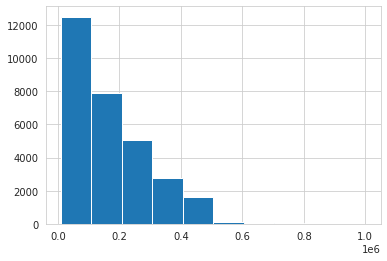

In [44]:
# Histograms:
sns.set_style('whitegrid')
plt.hist(credit['LIMIT_BAL'],bins=10)

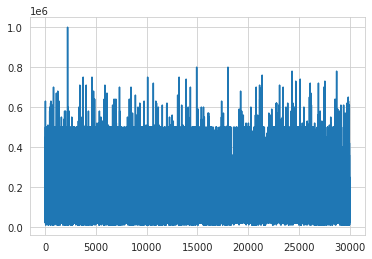

In [45]:
# Line Plots:
plt.plot(credit['LIMIT_BAL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


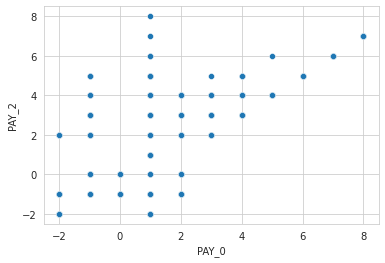

In [46]:
# Scatter Plots:
x = credit['PAY_0']
y = credit['PAY_2']
sns.scatterplot(x,y)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa6d4305710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa6d4308790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6d43107d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6d4310290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa6d4305cd0>,
  <matplotlib.lines.Line2D at 0x7fa6d4308250>]}

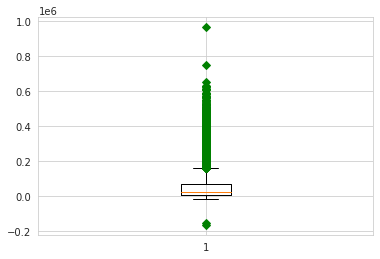

In [145]:
# Boxplot:
plt.boxplot(credit['BILL_AMT1'],0,'gD')

In [48]:
# Correlation:
corrMat = credit.corr()
corrMat

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,1.000000,0.026179,0.018497,0.026088,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.255138,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,0.153520
SEX,0.018497,0.024755,1.000000,0.011393,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,0.039961
EDUCATION,0.026088,-0.255138,0.011393,1.000000,-0.158187,0.193978,0.131623,0.153079,0.145646,0.137940,0.123666,0.110172,0.003621,0.000816,-0.004183,-0.014949,-0.018163,-0.015053,-0.046129,-0.040149,-0.057041,-0.044608,-0.051931,-0.054350,-0.054477
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.158187,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,0.024339
AGE,0.018678,0.144713,-0.090874,0.193978,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,-0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.131623,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,-0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.153079,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,-0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.145646,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,-0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.137940,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,-0.216614


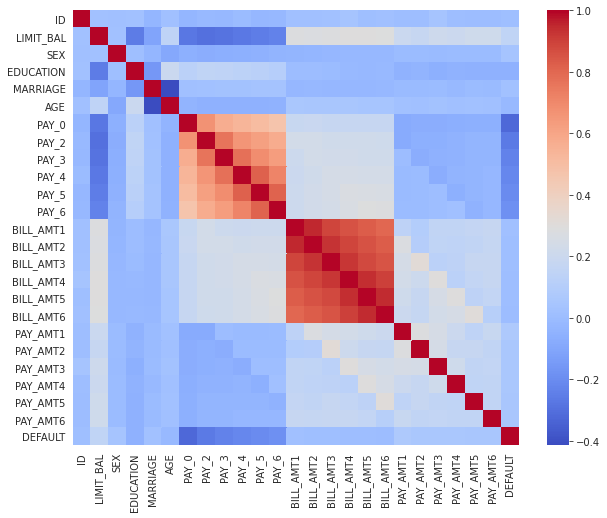

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(corrMat,cmap='coolwarm')

Text(0.5, 1.0, 'Correlation with Default')

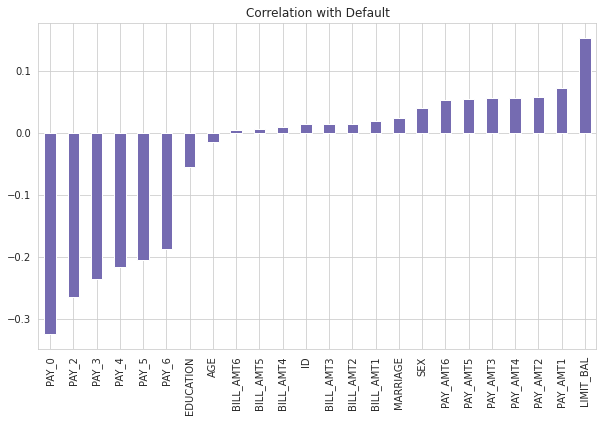

In [169]:
# Correlation with Default:
plt.figure(figsize=(10,6))
credit.corr()['DEFAULT'].sort_values().drop('DEFAULT').plot(kind="bar",color="#756bb1")
plt.title('Correlation with Default')

**DEFAULT** is highly correlated with "history of past payment," expecially the payment record of April 2005, and "amount of the given credit" (LIMIT_BAL). Others are not so relative.

Text(0.5, 1.0, 'Correlation with Amount')

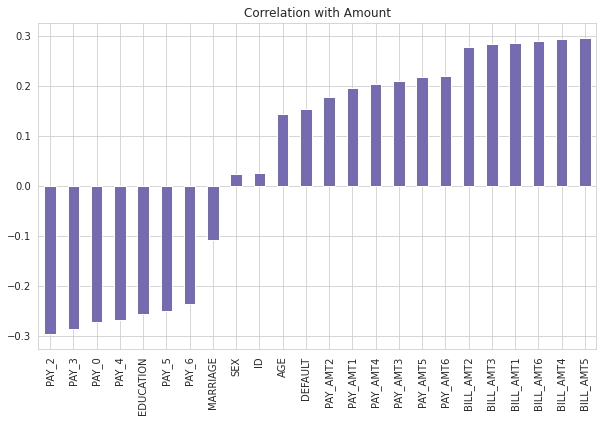

In [170]:
# Correlation with Amount:
plt.figure(figsize=(10,6))
credit.corr()['LIMIT_BAL'].sort_values().drop('LIMIT_BAL').plot(kind="bar",color="#756bb1")
plt.title('Correlation with Amount')

In [50]:
# Covariance:
covMat = credit.cov()
covMat

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,7.500250e+07,2.941664e+07,78.356379,157.845930,-131.452515,1491.057019,-297.572636,-116.276959,-191.692156,-27.691323,-217.860029,-201.877379,1.236447e+07,1.108392e+07,1.462688e+07,2.248126e+07,8.795803e+06,8.628506e+06,1.397501e+06,1.677383e+06,5.969803e+06,1.057334e+06,8.629502e+04,4.618460e+05,50.151705
LIMIT_BAL,2.941664e+07,1.683446e+10,1571.050630,-23156.465743,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,-36670.562325,-35093.083441,2.727020e+09,2.570130e+09,2.548533e+09,2.453926e+09,2.331481e+09,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,8267.551759
SEX,7.835638e+01,1.571051e+03,0.239247,0.003894,-0.008014,-0.409726,-0.031685,-0.041442,-0.038694,-0.034411,-0.030521,-0.024754,-1.211694e+03,-1.085595e+03,-8.332074e+02,-6.884896e+02,-5.056943e+02,-4.874302e+02,-1.964266e+00,-1.567550e+01,-7.403481e+01,-1.708011e+01,-1.245881e+01,-2.405188e+01,0.008113
EDUCATION,1.578459e+02,-2.315647e+04,0.003894,0.488103,-0.057665,1.248984,0.103428,0.128377,0.122190,0.113038,0.098218,0.088733,1.854318e+02,4.040317e+01,-2.018968e+02,-6.702615e+02,-7.700671e+02,-6.257542e+02,-5.350128e+02,-6.477583e+02,-6.980181e+02,-4.899077e+02,-5.527435e+02,-6.709261e+02,-0.015858
MARRIAGE,-1.314525e+02,-7.323670e+03,-0.008014,-0.057665,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,0.021074,0.020616,-9.021547e+02,-8.025179e+02,-9.016791e+02,-7.838816e+02,-8.058409e+02,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,0.005273
AGE,1.491057e+03,1.730767e+05,-0.409726,1.248984,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,-0.562245,-0.517022,3.817293e+04,3.561366e+04,3.433425e+04,3.045311e+04,2.765407e+04,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03,-0.053143
PAY_0,-2.975726e+02,-3.954593e+04,-0.031685,0.103428,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,0.648743,0.613292,1.548030e+04,1.518592e+04,1.401156e+04,1.295025e+04,1.234167e+04,1.184476e+04,-1.475495e+03,-1.815138e+03,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03,-0.151499
PAY_2,-1.162770e+02,-4.603765e+04,-0.041442,0.128377,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,0.844886,0.792320,2.070661e+04,2.004583e+04,1.860951e+04,1.711630e+04,1.611095e+04,1.564288e+04,-1.600241e+03,-1.627192e+03,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02,-0.130960
PAY_3,-1.916922e+02,-4.443225e+04,-0.038694,0.122190,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,0.931455,0.870815,1.837321e+04,2.021407e+04,1.888249e+04,1.749410e+04,1.638295e+04,1.584709e+04,2.566847e+01,-1.841953e+03,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02,-0.116867
PAY_4,-2.769132e+01,-4.057181e+04,-0.034411,0.113038,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,1.086161,0.963263,1.746020e+04,1.879063e+04,1.986300e+04,1.849642e+04,1.726555e+04,1.665159e+04,-1.812956e+02,-5.235817e+01,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02,-0.105115


## Further Exprolation

In [11]:
# Columns Names:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Education vs Default')

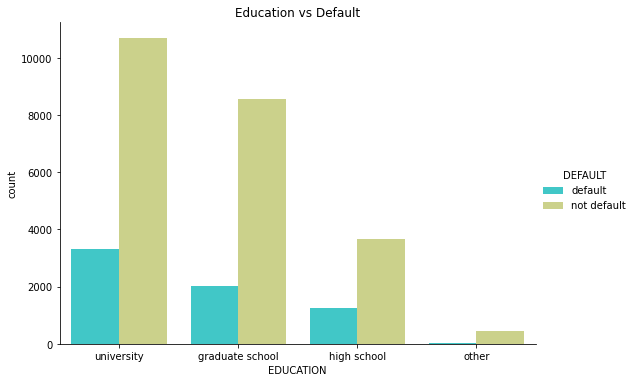

In [22]:
# Numbers of default/not default in each education class:
sns.factorplot('EDUCATION',data=credit,kind='count',hue='DEFAULT',palette='rainbow',aspect=1.5)
plt.title('Education vs Default')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex vs Default')

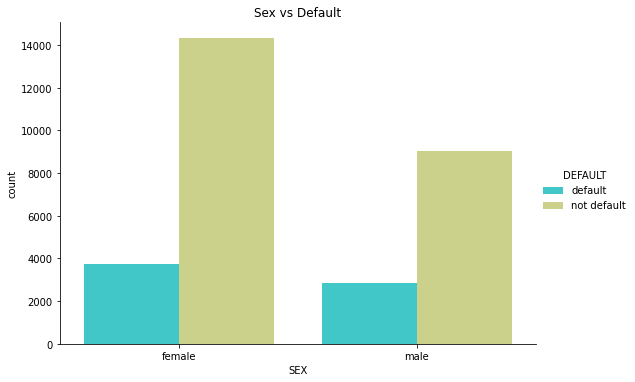

In [24]:
# Numbers of default/not default for male/female:
sns.factorplot('SEX',data=credit,kind='count',hue='DEFAULT',palette='rainbow',aspect=1.5)
plt.title('Sex vs Default')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Marriage vs Default')

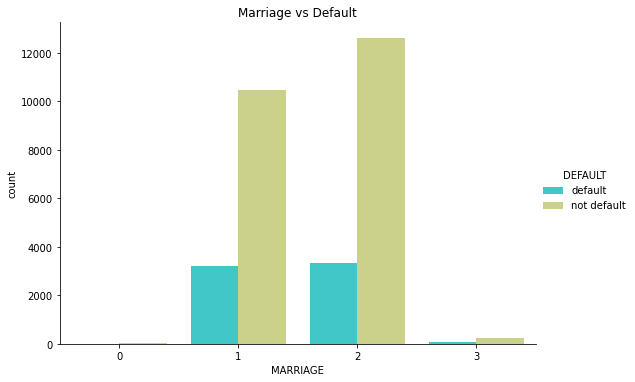

In [25]:
# Numbers of default/not default in each marriage class:
sns.factorplot('MARRIAGE',data=credit,kind='count',hue='DEFAULT',palette='rainbow',aspect=1.5)
plt.title('Marriage vs Default')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Education vs Sex')

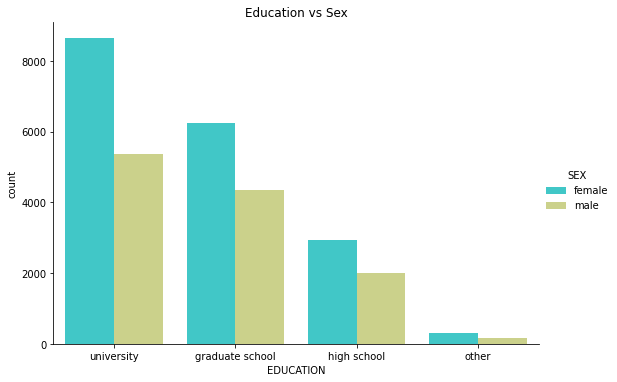

In [26]:
# Numbers of male/female in each education class:
sns.factorplot('EDUCATION',data=credit,kind='count',hue='SEX',palette='rainbow',aspect=1.5)
plt.title('Education vs Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Marriage vs Sex')

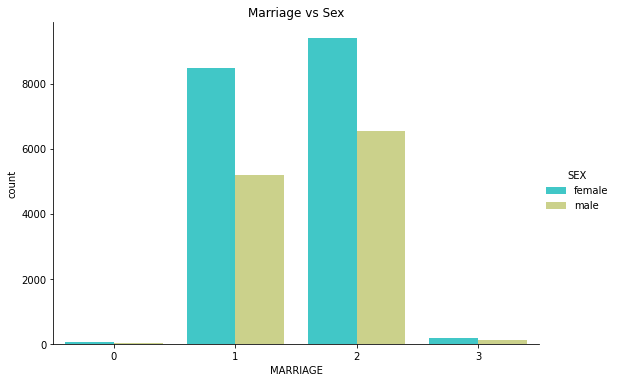

In [27]:
# Numbers of male/female in each marriage class:
sns.factorplot('MARRIAGE',data=credit,kind='count',hue='SEX',palette='rainbow',aspect=1.5)
plt.title('Marriage vs Sex')

In [70]:
# Number of customers who defaulted in each class grouped by sex. Also total was found for each class grouped by sex.
credit[credit['DEFAULT']==1].pivot_table('DEFAULT', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,graduate school,high school,other,university,All
SEX,,,,,
female,1130.0,692.0,19.0,1922.0,3763.0
male,906.0,545.0,14.0,1408.0,2873.0
All,2036.0,1237.0,33.0,3330.0,6636.0


In [72]:
# Description of AGE:
credit['AGE'].describe() # mean=35.49, midian=34.00

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [73]:
# Description of LIMIT_BAL:
credit['LIMIT_BAL'].describe() # mean=167484.32, midian=140000.00

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

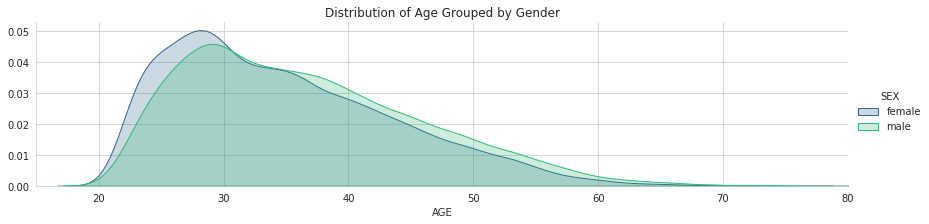

In [80]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4, palette='viridis')
fig.map(sns.kdeplot, 'AGE', shade=True)
fig.set(xlim=(15,80))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

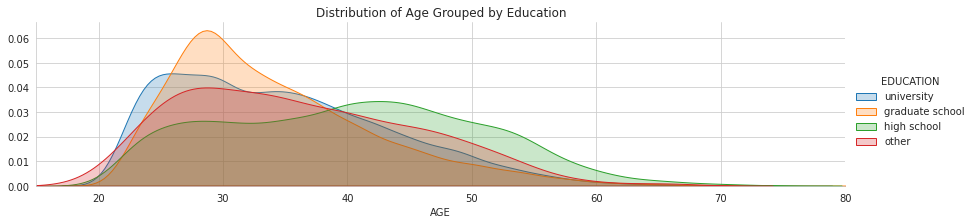

In [84]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
fig.set(xlim=(15,80))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

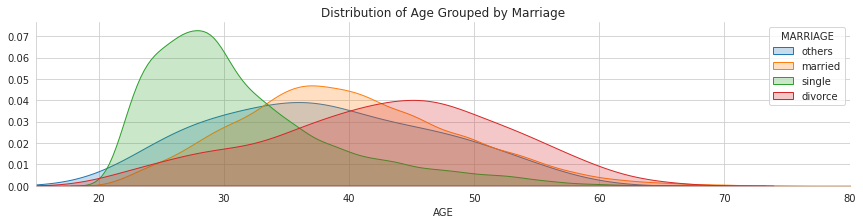

In [136]:
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True, legend=False)
fig.set(xlim=(15,80))
plt.legend(title='MARRIAGE',loc='upper right',labels=['others', 'married', 'single', 'divorce'])
fig.set(title='Distribution of Age Grouped by Marriage')

**Notice**</p>
"Single" group is more likely to be younger than other marriage group. 

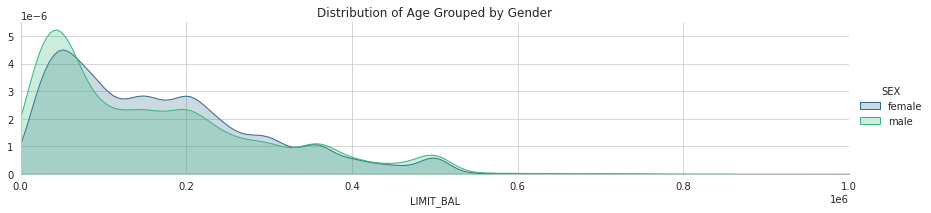

In [89]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4, palette='viridis')
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
MAX = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,MAX))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

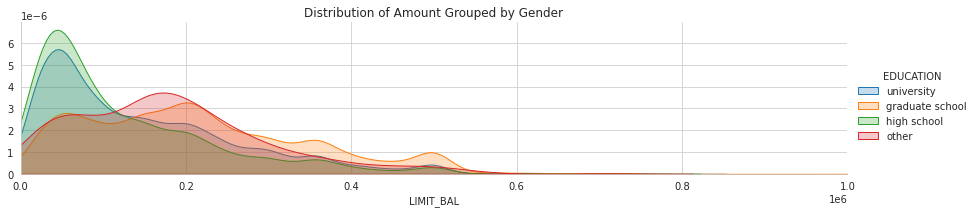

In [91]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
MAX = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,MAX))
fig.set(title='Distribution of Amount Grouped by Gender')
fig.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


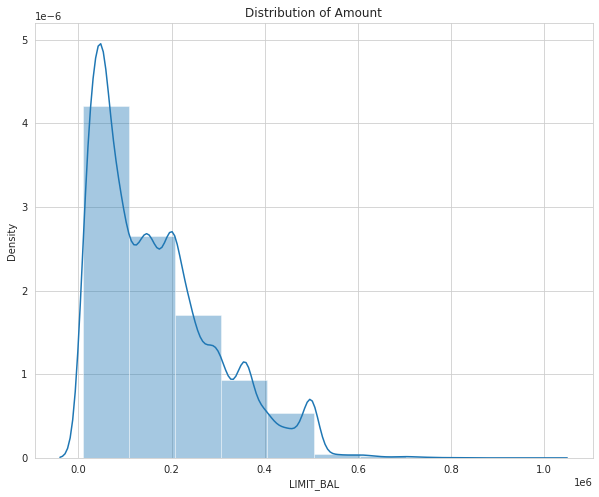

In [101]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(credit['LIMIT_BAL'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


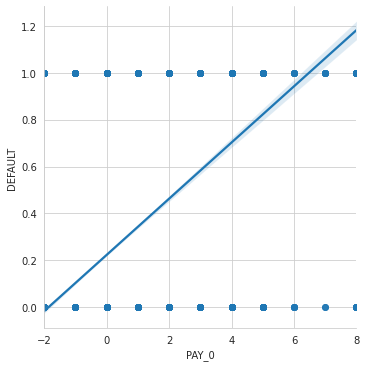

In [132]:
# Default vs Monthly Payment Record:
sns.lmplot('PAY_0','DEFAULT',data=credit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


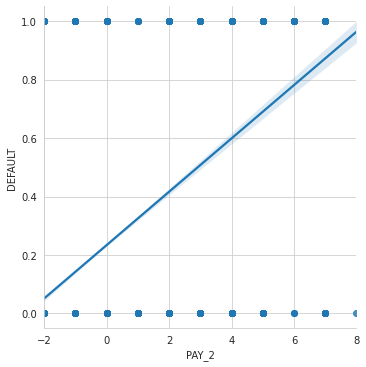

In [180]:
sns.lmplot('PAY_2','DEFAULT',data=credit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


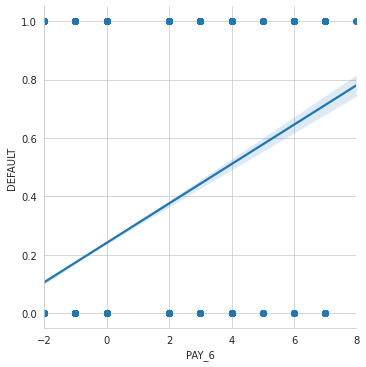

In [181]:
sns.lmplot('PAY_6','DEFAULT',data=credit)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


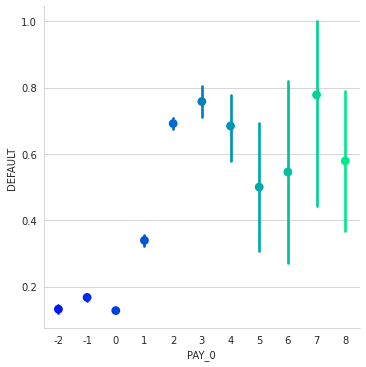

In [156]:
sns.factorplot('PAY_0', 'DEFAULT', data=credit, palette='winter') 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


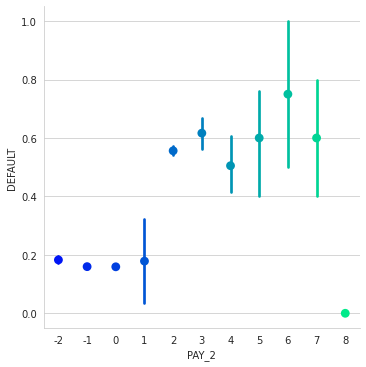

In [178]:
sns.factorplot('PAY_2', 'DEFAULT', data=credit, palette='winter') 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


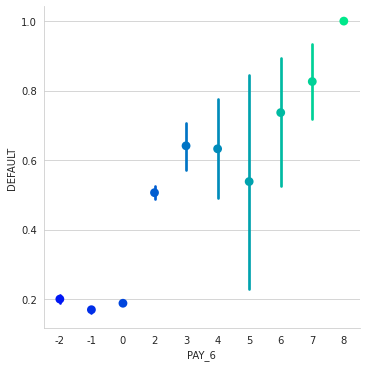

In [179]:
sns.factorplot('PAY_6', 'DEFAULT', data=credit, palette='winter') 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


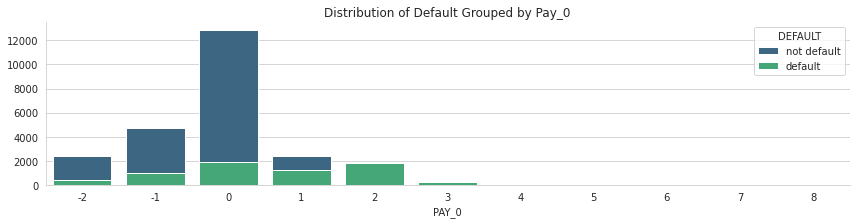

In [137]:
fig = sns.FacetGrid(credit, hue='DEFAULT', aspect=4, palette='viridis')
fig.map(sns.countplot, 'PAY_0')
# fig.set(xlim=(-2,8))
fig.set(title='Distribution of Default Grouped by Pay_0')
plt.legend(title='DEFAULT',loc='upper right',labels=['not default', 'default'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


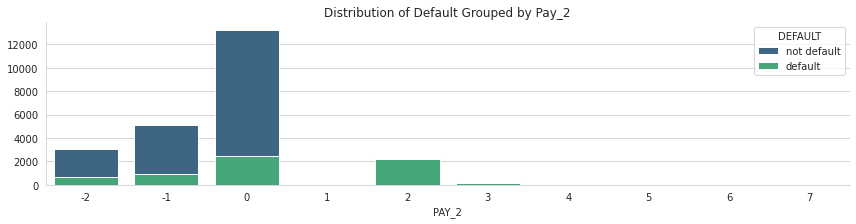

In [177]:
fig = sns.FacetGrid(credit, hue='DEFAULT', aspect=4, palette='viridis')
fig.map(sns.countplot, 'PAY_2')
# fig.set(xlim=(-2,8))
fig.set(title='Distribution of Default Grouped by Pay_2')
plt.legend(title='DEFAULT',loc='upper right',labels=['not default', 'default'])

**Conclusion**</p>
-2: No consumption; -1: Paid in full; 0: The use of revolving credit --> has a bigger chance not to default</p>
1 = payment delay for one month; 2 = payment delay for two months; ... --> who has a payment delay record is more likely to default

# Summary

**DEFAULT** is highly correlated with "history of past payment," expecially the payment record of April 2005, and "amount of the given credit" (LIMIT_BAL).</p>

**Insights**</p>

*   For "history of past payment", people with delay history are more likely to default. 
*   "ID", "AGE", "MARRIAGE" and "BILL-AMT 1~6" are not that related with "DEFAULT". So for the future machine learning, maybe it's good to remove these attributes from the predictors.
